In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import subprocess
import sys

# Path del binario del genético
binario = '../bin/genetic_trainer'

# Cosas que no tocaremos
n = 7
m = 6
c = 4
p = str(n*m*2)
generaciones = 100
cross = 'c:completo'
mut = 'm:multi'

# Cosas que tocaremos al final
p_mut = 0.1
pob = 10

# Para crear el comando que ejecuta el genético
def comando_genetico(fitness, seleccion):
    res = [binario] + [str(n)]+[str(m)]+[str(c)]+[str(p)]
    res = res+ [str(generaciones)] +[str(pob)]+[str(p_mut)]
    res = res+[fitness]+[seleccion]+[cross]+[mut]
    return res

# Para ejecutar subprocess en shell con stdout live
def shell(command):
    p = subprocess.Popen(command, stdout=subprocess.PIPE, bufsize=1)
    for line in iter(p.stdout.readline, b''):
        sys.stdout.write(line)
    p.stdout.close()
    p.wait()


# FITNESS:  vs golosos random
# SELECTION: probabilística


In [ ]:
fit = 'f:vs_golosos'
sel = 's:proba'
command = comando_genetico(fit,sel)

# Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
shell(command)

# Leo los fitness, los formateo en lista
with open('log/best_fitness_log.dat') as file:
    lista = file.read().splitlines()
fitness = list(map(float, lista))

# Leo los progenitores, los formateo en lista 
with open('log/progenitores.dat') as file:
    lista = file.read().splitlines()
for i in range(len(lista)):
    lista[i] = lista[i].split(',')
    lista[i] = list(map(float, lista[i]))
progenitores = lista

# Leo el ganador
with open('log/ganador.dat') as file:
    lista = file.read().splitlines()
ganador_fitness = float(lista[0])
ganador_genoma = list(map(float, lista[1].split(',')))

# Guardo todo como una super tupla
np.save('save/genetico/log_vs_goloso_proba.npy',(fitness,progenitores,ganador_fitness,ganador_genoma))

In [ ]:
(fitness,progenitores,ganador_fitness,ganador_genoma) = np.load('save/genetico/log_vs_goloso_proba.npy')

plt.plot(fitness)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.axhline(y=ganador_fitness, color='r', linestyle='-')
plt.savefig('plots/genetico/vs_goloso_proba.pdf',bbox_inches='tight')
plt.show()


plt.figure()
for i in range(len(progenitores[0])):
    plt.plot([genoma[i] for genoma in progenitores],label = 'id %s'%i)
    
plt.show()


# FITNESS:  vs randoms
# SELECTION: probabilística


In [ ]:
generaciones = 60
fit = 'f:vs_random'
sel = 's:proba'
command = comando_genetico(fit,sel)

# Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
shell(command)

# Leo los fitness, los formateo en lista
with open('log/best_fitness_log.dat') as file:
    lista = file.read().splitlines()
fitness = list(map(float, lista))

# Leo los progenitores, los formateo en lista 
with open('log/progenitores.dat') as file:
    lista = file.read().splitlines()
for i in range(len(lista)):
    lista[i] = lista[i].split(',')
    lista[i] = list(map(float, lista[i]))
progenitores = lista

# Leo el ganador
with open('log/ganador.dat') as file:
    lista = file.read().splitlines()
ganador_fitness = float(lista[0])
ganador_genoma = list(map(float, lista[1].split(',')))

# Guardo todo como una super tupla
np.save('save/genetico/log_vs_random_proba.npy',(fitness,progenitores,ganador_fitness,ganador_genoma))

In [ ]:
(fitness,progenitores,ganador_fitness,ganador_genoma) = np.load('save/genetico/log_vs_random_proba.npy')

plt.plot(fitness)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.axhline(y=ganador_fitness, color='r', linestyle='-')
plt.savefig('plots/genetico/vs_random_proba.pdf',bbox_inches='tight')
plt.show()


tops = [progenitores[i*2] for i in range(len(progenitores)//2)]


plt.figure()
plt.plot([genoma[1] for genoma in tops],label = '2')
plt.plot([genoma[2] for genoma in tops],label = '3')
plt.plot([genoma[3] for genoma in tops],label = '4')
plt.plot([genoma[4] for genoma in tops],label = '5')
plt.plot([genoma[5] for genoma in tops],label = '6')
plt.legend()

plt.figure()
plt.plot([genoma[6] for genoma in tops],label = '7')
plt.plot([genoma[7] for genoma in tops],label = '8')
plt.plot([genoma[8] for genoma in tops],label = '9')
plt.plot([genoma[9] for genoma in tops],label = '10')
plt.legend()

plt.show()


# FITNESS:  vs randoms
# SELECTION: por rank


In [ ]:
generaciones = 60

fit = 'f:vs_random'
sel = 's:rank'
command = comando_genetico(fit,sel)

# Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
shell(command)

# Leo los fitness, los formateo en lista
with open('log/best_fitness_log.dat') as file:
    lista = file.read().splitlines()
fitness = list(map(float, lista))

# Leo los progenitores, los formateo en lista 
with open('log/progenitores.dat') as file:
    lista = file.read().splitlines()
for i in range(len(lista)):
    lista[i] = lista[i].split(',')
    lista[i] = list(map(float, lista[i]))
progenitores = lista

# Leo el ganador
with open('log/ganador.dat') as file:
    lista = file.read().splitlines()
ganador_fitness = float(lista[0])
ganador_genoma = list(map(float, lista[1].split(',')))

# Guardo todo como una super tupla
np.save('save/genetico/log_vs_random_rank.npy',(fitness,progenitores,ganador_fitness,ganador_genoma))

In [ ]:
(fitness,progenitores,ganador_fitness,ganador_genoma) = np.load('save/genetico/log_vs_random_rank.npy')

print(ganador_genoma)
print(ganador_fitness)

plt.plot(fitness)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.axhline(y=ganador_fitness, color='r', linestyle='-')
plt.savefig('plots/genetico/vs_random_rank.pdf',bbox_inches='tight')
plt.show()


tops = [progenitores[i*2] for i in range(len(progenitores)//2)]

plt.figure()
plt.plot([genoma[1] for genoma in tops],label = '2')
plt.plot([genoma[2] for genoma in tops],label = '3')
plt.plot([genoma[3] for genoma in tops],label = '4')
plt.plot([genoma[4] for genoma in tops],label = '5')
plt.plot([genoma[5] for genoma in tops],label = '6')
plt.legend()

plt.figure()
plt.plot([genoma[6] for genoma in tops],label = '7')
plt.plot([genoma[7] for genoma in tops],label = '8')
plt.plot([genoma[8] for genoma in tops],label = '9')
plt.plot([genoma[9] for genoma in tops],label = '10')
plt.legend()

plt.show()


# FITNESS:  vs golosos random
# SELECTION: rank


In [63]:
fit = 'f:vs_golosos'
sel = 's:rank'
command = comando_genetico(fit,sel)

# Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
shell(command)

# Leo los fitness, los formateo en lista
with open('log/best_fitness_log.dat') as file:
    lista = file.read().splitlines()
fitness = list(map(float, lista))

# Leo los progenitores, los formateo en lista 
with open('log/progenitores.dat') as file:
    lista = file.read().splitlines()
for i in range(len(lista)):
    lista[i] = lista[i].split(',')
    lista[i] = list(map(float, lista[i]))
progenitores = lista

# Leo el ganador
with open('log/ganador.dat') as file:
    lista = file.read().splitlines()
ganador_fitness = float(lista[0])
ganador_genoma = list(map(float, lista[1].split(',')))

# Guardo todo como una super tupla
np.save('save/genetico/log_vs_goloso_rank.npy',(fitness,progenitores,ganador_fitness,ganador_genoma))

Creando entrenador...
-------------------------------------------------------
Población: 	10
Generaciones: 	100
P(mutación): 	0.1
Fitness: 	vs golosos random
Crossover: 	completo
Selección: 	por rank
Mutación: 	multi
-------------------------------------------------------
-------------------------------------------------------
> generacion 1
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.534
> seleccionando 2 progenitores
-1	79	-53	-80	-53	14	1	84	-74	83	
1	27	52	-71	63	53	89	-11	-4	59	
> genereando nueva población
-------------------------------------------------------
> generacion 2
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.596
> seleccionando 2 progenitores
-1	27	-53	-80	-53	53	89	-11	-74	-0	
1	27	89	-80	-53	53	1	84	0	59	
> genereando nueva población
-------------------------------------------------------
> generacion 3
------------------------------

	mejor fitness de la generación: 0.712
> seleccionando 2 progenitores
1	-0	4	-91	-53	53	1	22	0	60	
1	-0	-53	-80	-53	53	1	22	0	65	
> genereando nueva población
-------------------------------------------------------
> generacion 28
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.711
> seleccionando 2 progenitores
1	-0	4	-91	-53	53	1	22	0	60	
1	-0	-53	-80	-53	53	1	22	0	60	
> genereando nueva población
-------------------------------------------------------
> generacion 29
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.692
> seleccionando 2 progenitores
1	-0	-53	-91	-53	53	1	22	0	60	
1	-0	4	-91	-53	53	1	22	0	60	
> genereando nueva población
-------------------------------------------------------
> generacion 30
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.699
> seleccionando 2 progenitores
1	-0	-

	mejor fitness de la generación: 0.776
> seleccionando 2 progenitores
3	0	-16	-91	2	53	1	2	16	60	
3	0	-16	-91	2	53	1	0	16	60	
> genereando nueva población
-------------------------------------------------------
> generacion 55
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.796
> seleccionando 2 progenitores
3	3	-16	-91	2	53	1	0	56	60	
3	0	-16	-91	2	53	1	0	16	60	
> genereando nueva población
-------------------------------------------------------
> generacion 56
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.766
> seleccionando 2 progenitores
3	0	-16	-91	2	53	1	0	56	60	
3	3	-16	-91	2	53	1	0	56	60	
> genereando nueva población
-------------------------------------------------------
> generacion 57
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.779
> seleccionando 2 progenitores
3	0	-16	-91	-0	53	

	mejor fitness de la generación: 0.827
> seleccionando 2 progenitores
3	0	51	0	2	53	1	-0	3	60	
3	0	51	0	2	53	1	-0	3	60	
> genereando nueva población
-------------------------------------------------------
> generacion 83
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.823
> seleccionando 2 progenitores
3	0	51	0	2	53	1	-0	3	60	
3	0	51	0	2	53	1	-0	3	60	
> genereando nueva población
-------------------------------------------------------
> generacion 84
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.817
> seleccionando 2 progenitores
3	0	51	0	2	53	1	-0	3	60	
3	0	51	0	2	53	1	-0	3	60	
> genereando nueva población
-------------------------------------------------------
> generacion 85
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.808
> seleccionando 2 progenitores
3	0	51	0	2	53	1	-0	3	60	
3	0	51	0	2	

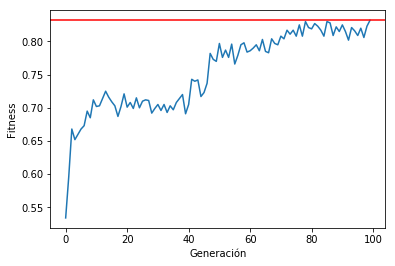

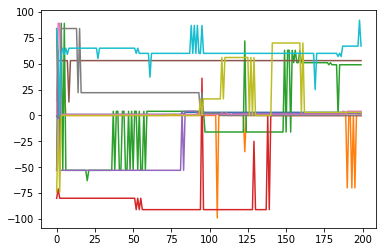

In [64]:
(fitness,progenitores,ganador_fitness,ganador_genoma) = np.load('save/genetico/log_vs_goloso_rank.npy')

plt.plot(fitness)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.axhline(y=ganador_fitness, color='r', linestyle='-')
plt.plot()
plt.show()

plt.figure()

for i in range(len(progenitores[0])):
    plt.plot([genoma[i] for genoma in progenitores],label = 'id %s'%i)
    
plt.show()